# Key Performance Indicator (KPI): Turnover

#### Imports and overview over dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [12]:
file_path = "C:\\Users\\jessi\\Desktop\\DSML\\Chicago\\Chicago\\"
chicago = pd.read_csv("{}chicago_2016.csv".format(file_path), sep=",", parse_dates=["start_time","end_time"])

In [13]:
chicago.info

<bound method DataFrame.info of                  start_time            end_time  start_station_id  \
0       2016-03-31 23:53:00 2016-04-01 00:07:00               344   
1       2016-03-31 23:46:00 2016-03-31 23:57:00               128   
2       2016-03-31 23:42:00 2016-03-31 23:46:00               350   
3       2016-03-31 23:37:00 2016-03-31 23:55:00               303   
4       2016-03-31 23:33:00 2016-03-31 23:37:00               334   
...                     ...                 ...               ...   
3595378 2016-10-01 00:01:08 2016-10-01 00:04:42                56   
3595379 2016-10-01 00:00:58 2016-10-01 00:09:33               255   
3595380 2016-10-01 00:00:41 2016-10-01 00:04:19                56   
3595381 2016-10-01 00:00:32 2016-10-01 00:16:02               298   
3595382 2016-10-01 00:00:14 2016-10-01 00:16:02               298   

         end_station_id              start_station_name  \
0                   458   Ravenswood Ave & Lawrence Ave   
1                   2

In [14]:
chicago.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-03-31 23:53:00,2016-04-01 00:07:00,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,2016-03-31 23:46:00,2016-03-31 23:57:00,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,2016-03-31 23:42:00,2016-03-31 23:46:00,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,2016-03-31 23:37:00,2016-03-31 23:55:00,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,2016-03-31 23:33:00,2016-03-31 23:37:00,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


### Analyzing user tpyes

In [15]:
user = chicago["user_type"].unique()
print(user)

['Subscriber' 'Customer' 'Dependent']


In [16]:
sub = chicago[chicago['user_type']=='Subscriber']
print(sub['start_time'].size)

2736869


In [17]:
cus = chicago[chicago['user_type']=='Customer']
print(cus['start_time'].size)

858474


#### The last user type "Dependent" is ignored in further analysis, since this user type started only 40 rides in 2016

In [18]:
dep = chicago[chicago['user_type']=='Dependent']
print(dep['start_time'].size)

40


## Subscribers: 

### Analyzing the number of rides by timeperiod 

In [87]:
morning_start_sub = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Subscriber')]
mid_morning_start_sub = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Subscriber')]
noon_start_sub = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Subscriber')]
afternoon_start_sub = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Subscriber')]
evening_start_sub = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Subscriber')]
night_start_sub = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Subscriber') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]

# Total number of rides by Subscribers
sub = chicago[chicago['user_type']=='Subscriber']
print(sub['start_time'].size)

2736869


In [89]:
# Number of rides per week

# Morning
morning_monday_sub = morning_start_sub[morning_start_sub['Weekday']==0]
morning_tuesday_sub = morning_start_sub[morning_start_sub['Weekday']==1]
morning_wednesday_sub = morning_start_sub[morning_start_sub['Weekday']==2]
morning_thursday_sub = morning_start_sub[morning_start_sub['Weekday']==3]
morning_friday_sub = morning_start_sub[morning_start_sub['Weekday']==4]
morning_saturday_sub = morning_start_sub[morning_start_sub['Weekday']==5]
morning_sunday_sub =  morning_start_sub[morning_start_sub['Weekday']==6]
morning_rides_sub = np.array([morning_monday_sub['Hour'].size, morning_tuesday_sub['Hour'].size, morning_wednesday_sub['Hour'].size,  morning_thursday_sub['Hour'].size,  morning_friday_sub['Hour'].size,  morning_saturday_sub['Hour'].size,  morning_sunday_sub['Hour'].size])

# Midmorning
midmorning_monday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==0]
midmorning_tuesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==1]
midmorning_wednesday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==2]
midmorning_thursday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==3]
midmorning_friday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==4]
midmorning_saturday_sub = mid_morning_start_sub[mid_morning_start_sub['Weekday']==5]
midmorning_sunday_sub =  mid_morning_start_sub[mid_morning_start_sub['Weekday']==6]
midmorning_rides_sub = np.array([midmorning_monday_sub['Hour'].size, midmorning_tuesday_sub['Hour'].size, midmorning_wednesday_sub['Hour'].size,  midmorning_thursday_sub['Hour'].size,  midmorning_friday_sub['Hour'].size,  midmorning_saturday_sub['Hour'].size,  midmorning_sunday_sub['Hour'].size])

# Noon
noon_monday_sub = noon_start_sub[noon_start_sub['Weekday']==0]
noon_tuesday_sub = noon_start_sub[noon_start_sub['Weekday']==1]
noon_wednesday_sub = noon_start_sub[noon_start_sub['Weekday']==2]
noon_thursday_sub = noon_start_sub[noon_start_sub['Weekday']==3]
noon_friday_sub = noon_start_sub[noon_start_sub['Weekday']==4]
noon_saturday_sub = noon_start_sub[noon_start_sub['Weekday']==5]
noon_sunday_sub =  noon_start_sub[noon_start_sub['Weekday']==6]
noon_rides_sub = np.array([noon_monday_sub['Hour'].size, noon_tuesday_sub['Hour'].size, noon_wednesday_sub['Hour'].size,  noon_thursday_sub['Hour'].size,  noon_friday_sub['Hour'].size, noon_saturday_sub['Hour'].size, noon_sunday_sub['Hour'].size])

# Afternoon
afternoon_monday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==0]
afternoon_tuesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==1]
afternoon_wednesday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==2]
afternoon_thursday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==3]
afternoon_friday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==4]
afternoon_saturday_sub = afternoon_start_sub[afternoon_start_sub['Weekday']==5]
afternoon_sunday_sub =  afternoon_start_sub[afternoon_start_sub['Weekday']==6]
afternoon_rides_sub = np.array([afternoon_monday_sub['Hour'].size, afternoon_tuesday_sub['Hour'].size, afternoon_wednesday_sub['Hour'].size,  afternoon_thursday_sub['Hour'].size,  afternoon_friday_sub['Hour'].size, afternoon_saturday_sub['Hour'].size, afternoon_sunday_sub['Hour'].size])

# Evening
evening_monday_sub = evening_start_sub[evening_start_sub['Weekday']==0]
evening_tuesday_sub = evening_start_sub[evening_start_sub['Weekday']==1]
evening_wednesday_sub = evening_start_sub[evening_start_sub['Weekday']==2]
evening_thursday_sub = evening_start_sub[evening_start_sub['Weekday']==3]
evening_friday_sub = evening_start_sub[evening_start_sub['Weekday']==4]
evening_saturday_sub = evening_start_sub[evening_start_sub['Weekday']==5]
evening_sunday_sub =  evening_start_sub[evening_start_sub['Weekday']==6]
evening_rides_sub = np.array([evening_monday_sub['Hour'].size, evening_tuesday_sub['Hour'].size, evening_wednesday_sub['Hour'].size,  evening_thursday_sub['Hour'].size,  evening_friday_sub['Hour'].size, evening_saturday_sub['Hour'].size, evening_sunday_sub['Hour'].size])

# Night
night_monday_sub = night_start_sub[night_start_sub['Weekday']==0]
night_tuesday_sub = night_start_sub[night_start_sub['Weekday']==1]
night_wednesday_sub = night_start_sub[night_start_sub['Weekday']==2]
night_thursday_sub = night_start_sub[night_start_sub['Weekday']==3]
night_friday_sub = night_start_sub[night_start_sub['Weekday']==4]
night_saturday_sub = night_start_sub[night_start_sub['Weekday']==5]
night_sunday_sub =  night_start_sub[night_start_sub['Weekday']==6]
night_rides_sub = np.array([night_monday_sub['Hour'].size, night_tuesday_sub['Hour'].size, night_wednesday_sub['Hour'].size,  night_thursday_sub['Hour'].size,  night_friday_sub['Hour'].size, night_saturday_sub['Hour'].size, night_sunday_sub['Hour'].size])


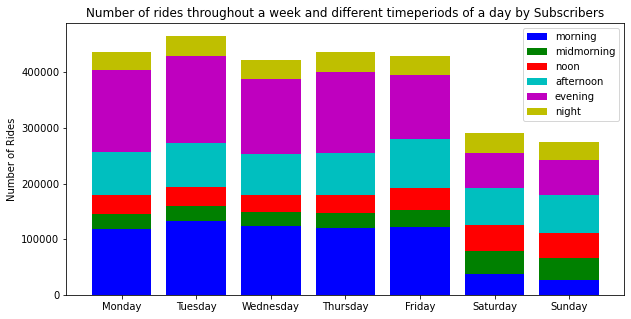

In [97]:
# Plot displays number of rides throughout a week and different timeperiods by Subscribers
fig,ax = plt.subplots(figsize=(10,5))
weekdays_sub = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_sub, midmorning_rides_sub, noon_rides_sub, afternoon_rides_sub, evening_rides_sub, night_rides_sub])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_sub, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

plt.legend(['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night'])
#ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of rides throughout a week and different timeperiods of a day by Subscribers")

plt.show()

## Costumers:

### Analyzing the number of rides by timeperiod

In [86]:
morning_start_cust = chicago[(chicago['Hour']>=6) & (chicago['Hour']<10) & (chicago['user_type']=='Customer')]
mid_morning_start_cust = chicago[(chicago['Hour']>=10) & (chicago['Hour']<12)& (chicago['user_type']=='Customer')]
noon_start_cust = chicago[(chicago['Hour']>=12) & (chicago['Hour']<14)& (chicago['user_type']=='Customer')]
afternoon_start_cust = chicago[(chicago['Hour']>=14) & (chicago['Hour']<17)& (chicago['user_type']=='Customer')]
evening_start_cust = chicago[(chicago['Hour']>=17) & (chicago['Hour']<21)& (chicago['user_type']=='Customer')]
night_start_cust = chicago[((chicago['Hour']>=21) &  (chicago['user_type']=='Customer') &(chicago['Hour']<24)) | ((chicago['Hour']>=0) & (chicago['Hour']<6))]

# Total number of rides by Customers
cust = chicago[chicago['user_type']=='Customer']
print(cust['start_time'].size)

858474


In [91]:
# Number of rides per week

# Morning
morning_monday_cust = morning_start_cust[morning_start_cust['Weekday']==0]
morning_tuesday_cust = morning_start_cust[morning_start_cust['Weekday']==1]
morning_wednesday_cust = morning_start_cust[morning_start_cust['Weekday']==2]
morning_thursday_cust = morning_start_cust[morning_start_cust['Weekday']==3]
morning_friday_cust = morning_start_cust[morning_start_cust['Weekday']==4]
morning_saturday_cust = morning_start_cust[morning_start_cust['Weekday']==5]
morning_sunday_cust =  morning_start_cust[morning_start_cust['Weekday']==6]
morning_rides_cust = np.array([morning_monday_cust['Hour'].size, morning_tuesday_cust['Hour'].size, morning_wednesday_cust['Hour'].size,  morning_thursday_cust['Hour'].size,  morning_friday_cust['Hour'].size,  morning_saturday_cust['Hour'].size,  morning_sunday_cust['Hour'].size])

# Midmorning
midmorning_monday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==0]
midmorning_tuesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==1]
midmorning_wednesday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==2]
midmorning_thursday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==3]
midmorning_friday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==4]
midmorning_saturday_cust = mid_morning_start_cust[mid_morning_start_cust['Weekday']==5]
midmorning_sunday_cust =  mid_morning_start_cust[mid_morning_start_cust['Weekday']==6]
midmorning_rides_cust = np.array([midmorning_monday_cust['Hour'].size, midmorning_tuesday_cust['Hour'].size, midmorning_wednesday_cust['Hour'].size,  midmorning_thursday_cust['Hour'].size,  midmorning_friday_cust['Hour'].size,  midmorning_saturday_cust['Hour'].size,  midmorning_sunday_cust['Hour'].size])

# Noon
noon_monday_cust = noon_start_cust[noon_start_cust['Weekday']==0]
noon_tuesday_cust = noon_start_cust[noon_start_cust['Weekday']==1]
noon_wednesday_cust = noon_start_cust[noon_start_cust['Weekday']==2]
noon_thursday_cust = noon_start_cust[noon_start_cust['Weekday']==3]
noon_friday_cust = noon_start_cust[noon_start_cust['Weekday']==4]
noon_saturday_cust = noon_start_cust[noon_start_cust['Weekday']==5]
noon_sunday_cust =  noon_start_cust[noon_start_cust['Weekday']==6]
noon_rides_cust = np.array([noon_monday_cust['Hour'].size, noon_tuesday_cust['Hour'].size, noon_wednesday_cust['Hour'].size,  noon_thursday_cust['Hour'].size,  noon_friday_cust['Hour'].size, noon_saturday_cust['Hour'].size, noon_sunday_cust['Hour'].size])

# Afternoon
afternoon_monday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==0]
afternoon_tuesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==1]
afternoon_wednesday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==2]
afternoon_thursday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==3]
afternoon_friday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==4]
afternoon_saturday_cust = afternoon_start_cust[afternoon_start_cust['Weekday']==5]
afternoon_sunday_cust =  afternoon_start_cust[afternoon_start_cust['Weekday']==6]
afternoon_rides_cust = np.array([afternoon_monday_cust['Hour'].size, afternoon_tuesday_cust['Hour'].size, afternoon_wednesday_cust['Hour'].size,  afternoon_thursday_cust['Hour'].size,  afternoon_friday_cust['Hour'].size, afternoon_saturday_cust['Hour'].size, afternoon_sunday_cust['Hour'].size])

# Evening
evening_monday_cust = evening_start_cust[evening_start_cust['Weekday']==0]
evening_tuesday_cust = evening_start_cust[evening_start_cust['Weekday']==1]
evening_wednesday_cust = evening_start_cust[evening_start_cust['Weekday']==2]
evening_thursday_cust = evening_start_cust[evening_start_cust['Weekday']==3]
evening_friday_cust = evening_start_cust[evening_start_cust['Weekday']==4]
evening_saturday_cust = evening_start_cust[evening_start_cust['Weekday']==5]
evening_sunday_cust =  evening_start_cust[evening_start_cust['Weekday']==6]
evening_rides_cust = np.array([evening_monday_cust['Hour'].size, evening_tuesday_cust['Hour'].size, evening_wednesday_cust['Hour'].size,  evening_thursday_cust['Hour'].size,  evening_friday_cust['Hour'].size, evening_saturday_cust['Hour'].size, evening_sunday_cust['Hour'].size])

# Night
night_monday_cust = night_start_cust[night_start_cust['Weekday']==0]
night_tuesday_cust = night_start_cust[night_start_cust['Weekday']==1]
night_wednesday_cust = night_start_cust[night_start_cust['Weekday']==2]
night_thursday_cust = night_start_cust[night_start_cust['Weekday']==3]
night_friday_cust = night_start_cust[night_start_cust['Weekday']==4]
night_saturday_cust = night_start_cust[night_start_cust['Weekday']==5]
night_sunday_cust =  night_start_cust[night_start_cust['Weekday']==6]
night_rides_cust = np.array([night_monday_cust['Hour'].size, night_tuesday_cust['Hour'].size, night_wednesday_cust['Hour'].size,  night_thursday_cust['Hour'].size,  night_friday_cust['Hour'].size, night_saturday_cust['Hour'].size, night_sunday_cust['Hour'].size])

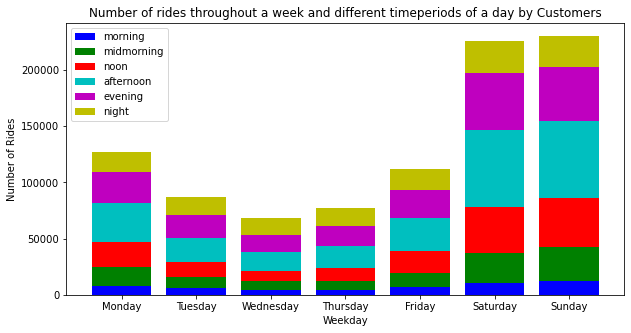

In [98]:
# Plot displays number of rides throughout a week and different timeperiods by Customers
fig,ax = plt.subplots(figsize=(10,5))
weekdays_cust= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([morning_rides_cust, midmorning_rides_cust, noon_rides_cust, afternoon_rides_cust, evening_rides_cust, night_rides_cust])
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(data.shape[0]):
  plt.bar(weekdays_cust, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

plt.legend(['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night'])
ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of rides throughout a week and different timeperiods of a day by Customers")

plt.show()

## Taking pricing into account...

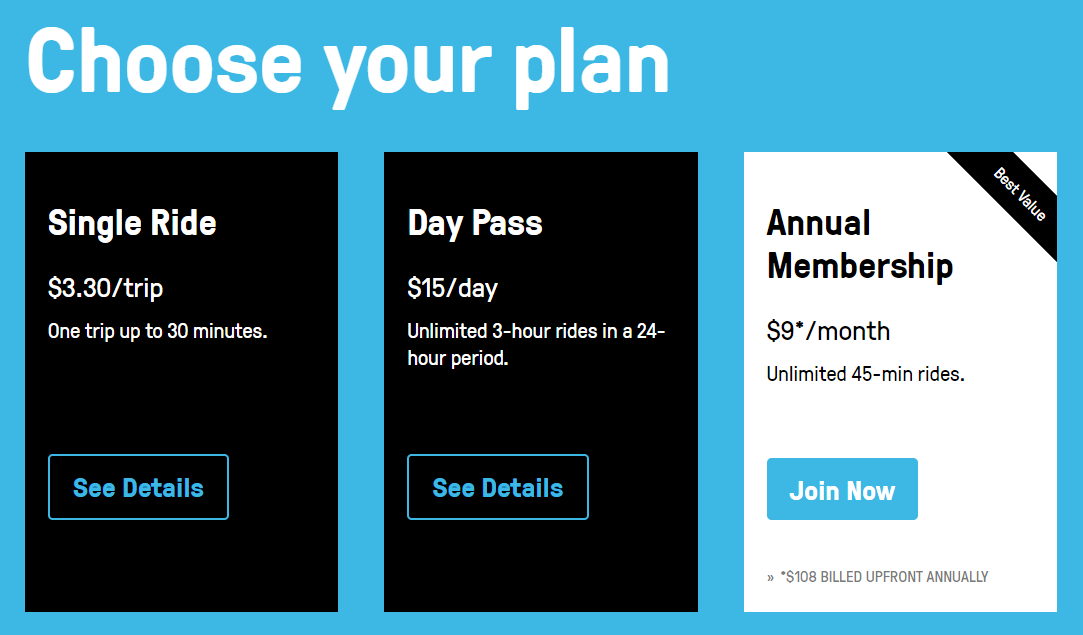

In [100]:
from IPython.core.display import Image, display

img_path = "C:\\Users\\jessi\\OneDrive - Universität zu Köln\\Dokumente\\WI Jessys Uni Stuff\\4. Semester\\Machine Learning\\Group Project\\"

Image(filename = img_path + "DivyBikes_Pricing.png", width=1000, height=1000)

### Looking at the official pricing plan on the DivvyBike Website, we are presented with 3 pricing options. 
### For the two rider types "Subscriber" and "Customer" we will use the following numbers in our further analysis: 

#### We assume, that every single ride has been done by a different person, which means that eventhough a Day Pass or an Annual Membership rider could potentially ride multiple times a day, they have only ridden once per day. We have to make this assumption in order to calculate each price PER RIDE instead of per day...


- Subscriber: 108 USD / 365 Days = 0,295890411 --> 0,30 USD per Ride(Day)

- Customer: We also assume a 50/50 distribution of Single Ride and Day Passes (since we could not find any more info). Based on this assumption: 3,30 USD + 15 USD = 18,30 USD -->/2 = 9,15 USD on average per Ride(Day)

#### 1. Example: Rides by Subscribers on a Monday - sorted by timeperiods

118939
26408
34667
77455
145991
32737


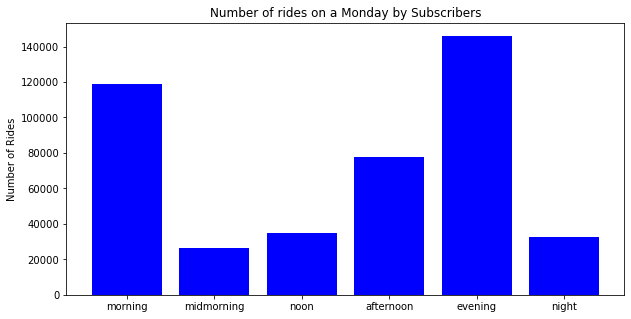

In [118]:
# Plot displays number of rides on a Monday by Subscribers
fig,ax = plt.subplots(figsize=(10,5))
timeperiods_sub = ['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night']
data = np.array([morning_monday_sub['Hour'].size, midmorning_monday_sub['Hour'].size, noon_monday_sub['Hour'].size, afternoon_monday_sub['Hour'].size, evening_monday_sub['Hour'].size, night_monday_sub['Hour'].size])

for i in range(len(data)):
    plt.bar(timeperiods_sub, data, color = 'b')

print(morning_monday_sub['Hour'].size)
print(midmorning_monday_sub['Hour'].size)
print(noon_monday_sub['Hour'].size)
print(afternoon_monday_sub['Hour'].size)
print(evening_monday_sub['Hour'].size)
print(night_monday_sub['Hour'].size)


ax.set_ylabel("Number of Rides")
ax.set_title("Number of rides on a Monday by Subscribers")

plt.show()

#### Turnover in USD generated on a Monday by Subscribers - sorted by timeperiods

35681.7
7922.4
10400.1
23236.5
43797.299999999996
9821.1


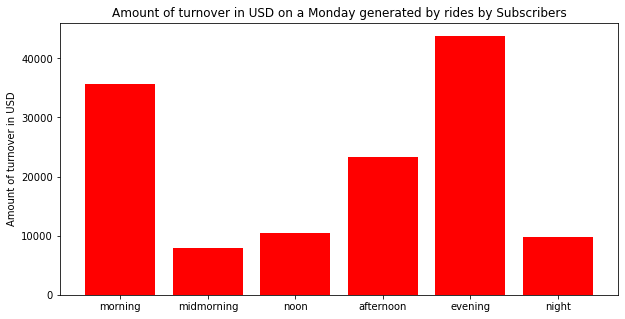

In [127]:
# Plot displays the turnover in USD generated by rides by Subscribers on a Monday
fig,ax = plt.subplots(figsize=(10,5))
timeperiods_sub = ['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night']
data = np.array([(morning_monday_sub['Hour'].size)*0.30, (midmorning_monday_sub['Hour'].size)*0.30, (noon_monday_sub['Hour'].size)*0.30, (afternoon_monday_sub['Hour'].size)*0.30, (evening_monday_sub['Hour'].size)*0.30, (night_monday_sub['Hour'].size)*0.30])

for i in range(len(data)):
    plt.bar(timeperiods_sub, data, color = 'r')

print(morning_monday_sub['Hour'].size *0.30)
print(midmorning_monday_sub['Hour'].size *0.30)
print(noon_monday_sub['Hour'].size *0.30)
print(afternoon_monday_sub['Hour'].size *0.30)
print(evening_monday_sub['Hour'].size *0.30)
print(night_monday_sub['Hour'].size *0.30)


ax.set_ylabel("Amount of turnover in USD")
ax.set_title("Amount of turnover in USD on a Monday generated by rides by Subscribers")

plt.show()

#### 2. Example: Rides by Customers on a Monday - sorted by timeperiods

7843
16718
22605
34237
27594
18196


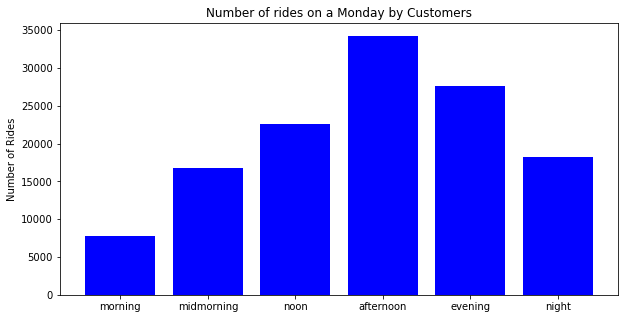

In [128]:
# Plot displays number of rides on a Monday by Customers
fig,ax = plt.subplots(figsize=(10,5))
timeperiods_sub = ['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night']
data = np.array([morning_monday_cust['Hour'].size, midmorning_monday_cust['Hour'].size, noon_monday_cust['Hour'].size, afternoon_monday_cust['Hour'].size, evening_monday_cust['Hour'].size, night_monday_cust['Hour'].size])

for i in range(len(data)):
    plt.bar(timeperiods_sub, data, color = 'b')

print(morning_monday_cust['Hour'].size)
print(midmorning_monday_cust['Hour'].size)
print(noon_monday_cust['Hour'].size)
print(afternoon_monday_cust['Hour'].size)
print(evening_monday_cust['Hour'].size)
print(night_monday_cust['Hour'].size)


ax.set_ylabel("Number of Rides")
ax.set_title("Number of rides on a Monday by Customers")

plt.show()

#### Turnover in USD generated on a Monday by Customers - sorted by timeperiods

71763.45
152969.7
206835.75
313268.55
252485.1
166493.4


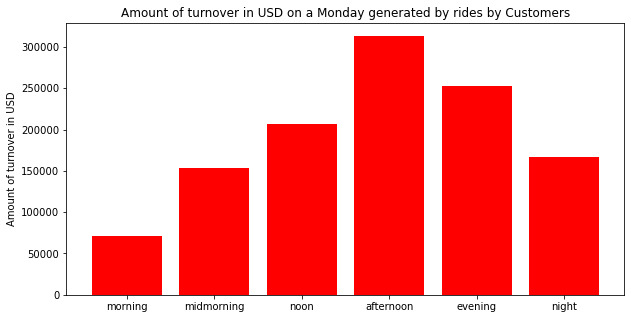

In [129]:
# Plot displays the turnover in USD generated by rides by Customers on a Monday
fig,ax = plt.subplots(figsize=(10,5))
timeperiods_sub = ['morning', 'midmorning', 'noon', 'afternoon', 'evening', 'night']
data = np.array([(morning_monday_cust['Hour'].size)*9.15, (midmorning_monday_cust['Hour'].size)*9.15, (noon_monday_cust['Hour'].size)*9.15, (afternoon_monday_cust['Hour'].size)*9.15, (evening_monday_cust['Hour'].size)*9.15, (night_monday_cust['Hour'].size)*9.15])

for i in range(len(data)):
    plt.bar(timeperiods_sub, data, color = 'r')

print(morning_monday_cust['Hour'].size *9.15)
print(midmorning_monday_cust['Hour'].size *9.15)
print(noon_monday_cust['Hour'].size *9.15)
print(afternoon_monday_cust['Hour'].size *9.15)
print(evening_monday_cust['Hour'].size *9.15)
print(night_monday_cust['Hour'].size *9.15)

ax.set_ylabel("Amount of turnover in USD")
ax.set_title("Amount of turnover in USD on a Monday generated by rides by Customers")

plt.show()